# Project On Women Health Care Using Machine Learning Techniques

# Problem Statement

# People across the United States were asked a series of over 1700 questions about their demographics, pregnancies, family planning, use of healthcare services, and medical insurance. We're focusing on the respondents to these questions that are women, and each row in the provided data represents an individual.


# Deliverable 1

# Your goal is to predict which health care services these respondents used in the last 12 months. Performance Metrics need to be published
# Though the problem expects us to predict for 14 possible services you are free to pick up any 4 out of the 14



# Importing All The Required Libraries

In [318]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss
import warnings
warnings.filterwarnings("ignore")


# Reading Csv File From Local Disk

In [319]:
x=pd.read_csv("C:\\Users\\KATA\\Documents\\DATA SCIENCE\\project\\Capstone Project\\train Data.csv")
y=pd.read_csv("C:\\Users\\KATA\\Documents\\DATA SCIENCE\\project\\Capstone Project\\train labels.csv")

In [320]:
x.head()

,id,release,n_0000,n_0001,n_0002,n_0003,n_0004,n_0005,n_0006,n_0007,...,c_1368,c_1369,c_1370,c_1371,c_1372,c_1373,c_1374,c_1375,c_1376,c_1377
0,11193,a,NaN,NaN,0.025449,NaN,NaN,0.368421,NaN,NaN,...,NaN,NaN,NaN,NaN,a,NaN,q,NaN,NaN,NaN
1,11382,a,NaN,NaN,0.031297,NaN,NaN,0.315789,NaN,NaN,...,NaN,NaN,a,NaN,a,NaN,NaN,NaN,NaN,NaN
2,16531,a,NaN,NaN,0.024475,NaN,NaN,0.342105,NaN,NaN,...,NaN,NaN,a,NaN,a,NaN,b,NaN,NaN,NaN
3,1896,a,NaN,NaN,0.041694,NaN,NaN,0.447368,NaN,NaN,...,NaN,NaN,NaN,NaN,a,NaN,NaN,NaN,NaN,NaN
4,18262,c,NaN,NaN,0.038120,NaN,NaN,0.315789,NaN,NaN,...,NaN,NaN,b,NaN,a,NaN,a,NaN,NaN,NaN


In [321]:
y.head()

,id,service_a,service_b,service_c,service_d,service_e,service_f,service_g,service_h,service_i,service_j,service_k,service_l,service_m,service_n
0,11193,1,1,0,0,0,0,0,0,0,1,1,0,0,0
1,11382,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,16531,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,1896,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,18262,0,0,0,1,1,0,0,0,0,0,1,1,1,0


# Dropping Unwanted Columns from Both The Files

In [218]:
x.drop(["id","release"],axis=1,inplace=True)

In [219]:
y.drop(["id"],axis=1,inplace=True)

# Checking Null Values

In [220]:
x.isnull().sum()

n_0000    14625
n_0001    13884
n_0002      644
n_0003    14444
n_0004    14545
          ...  
c_1373    13830
c_1374     8852
c_1375    13623
c_1376    14636
c_1377    11071
Length: 1377, dtype: int64

In [221]:
y.isnull().sum()

service_a    0
service_b    0
service_c    0
service_d    0
service_e    0
service_f    0
service_g    0
service_h    0
service_i    0
service_j    0
service_k    0
service_l    0
service_m    0
service_n    0
dtype: int64

# Retaning Only 20% of Null Values from The Given Data

In [222]:
p=int(x.shape[0]*0.8)

In [223]:
p

11715

In [224]:
x.dropna(axis=1,how="any",thresh=p,inplace=True)

# Checking The Shape After Dropping Them

In [225]:
x.shape

(14644, 96)

# Imputation Of Null Values

In [226]:
for f in x.columns :
    if f.startswith("n_") :
        x[f].fillna(value=x[f].mean(),inplace=True)
    elif f.startswith("o_") :
        x[f].fillna(value=x[f].mean(),inplace=True)
    elif f.startswith("c_") :
        x[f].fillna(value=x[f].mode()[0],inplace=True)

# Checking Null Values

In [227]:
x.isnull().sum()

n_0002    0
n_0005    0
n_0019    0
n_0038    0
n_0047    0
         ..
c_1259    0
c_1286    0
c_1316    0
c_1348    0
c_1372    0
Length: 96, dtype: int64

# Converting Categorical Variables into Dummies 

In [228]:
x=pd.get_dummies(x,drop_first=True)

In [229]:
x.shape

(14644, 214)

# Building The Model Using Binary Relevance 

In [230]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [231]:
dt=DecisionTreeClassifier(max_depth=4,min_samples_leaf=5,max_leaf_nodes=5,random_state=123)

In [232]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [233]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [234]:
pred=dt.predict(x_test)

In [235]:
print(zero_one_loss(y_test,pred))

0.7360874018436326


# Visuvalizing  The Tree

No handles with labels found to put in legend.


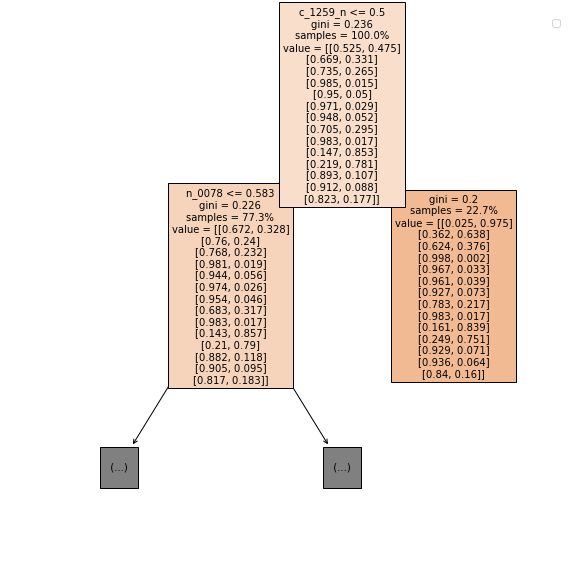

In [236]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(figsize=(10,10))
plot_tree(dt,feature_names=x_train.columns,filled=True,proportion=True,max_depth=1,fontsize=10)
plt.legend()

In [237]:
from sklearn.ensemble import RandomForestClassifier

In [238]:
rf=RandomForestClassifier(n_estimators=400,max_depth=12,max_features="auto",max_leaf_nodes=10,random_state=13)

In [239]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [240]:
pred1=rf.predict(x_test)

In [241]:
print(zero_one_loss(y_test,pred1))

0.7644247183339024


In [242]:
b=pd.DataFrame(rf.feature_importances_,index=x_train.columns,columns=["Importance"]).sort_values("Importance",ascending=False)

In [243]:
b.head()

,Importance
c_1259_n,0.179874
n_0078,0.094342
n_0108,0.081212
n_0002,0.075510
c_1259_e,0.058632


# Visuvalizing Feature Importance

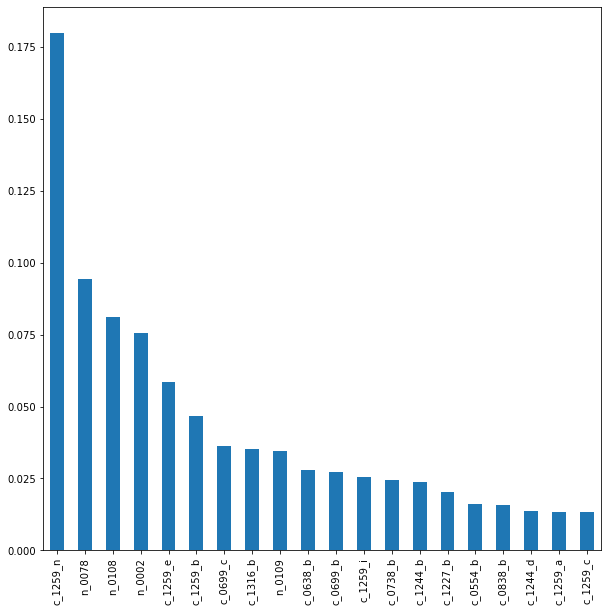

In [248]:
plt.figure(figsize=(10,10))
rf4=pd.Series(rf.feature_importances_,index=x_train.columns)
rf4.nlargest(20).plot(kind="bar")

# Re Traning The Model Based On top 20 features

In [249]:
z=x[["c_1259_n","n_0108","n_0078","n_0002","c_1259_e","c_1259_b","c_0699_c","n_0109","c_1316_b","c_0699_b","c_0638_b","c_1259_i","c_1244_b","c_0738_b","c_1227_b","c_0554_b","c_1244_d","c_0838_b","c_1259_c","c_1259_a"]]

In [250]:
rf1=RandomForestClassifier(n_estimators=600,max_depth=12,max_features="auto",max_samples=20,random_state=123)

In [251]:
rf1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [252]:
pred3=rf1.predict(x_test)

In [253]:
print(zero_one_loss(y_test,pred3))

0.7855923523386821


In [254]:
from sklearn.neural_network import MLPClassifier

In [255]:
m=MLPClassifier(activation="logistic",alpha=0.01,solver="sgd",momentum=0.3,random_state=123)

In [256]:
m.fit(x_train,y_train)

MLPClassifier(activation='logistic', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.3, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=123, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [257]:
pred5=m.predict(x_test)

In [258]:
print(zero_one_loss(y_test,pred5))

0.8221235916695118


# Building The Model With Binary Encoding

In [259]:
y=y[["service_a","service_b","service_c","service_d"]]

In [261]:
y=y.apply(lambda x:x.map(str),axis=0)
y["comb"]=y["service_a"]+y["service_b"]+y["service_c"]+y["service_d"]

In [263]:
y.drop(["service_a","service_b","service_c","service_d"],axis=1,inplace=True)

In [281]:
dt1=DecisionTreeClassifier(max_depth=8,min_samples_leaf=5,max_leaf_nodes=5,random_state=123)
dt1.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [282]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [283]:
predict=dt.predict(x_test)

In [284]:
print(zero_one_loss(y_test,predict))

0.7360874018436326


In [300]:
rf3=RandomForestClassifier(n_estimators=400,max_depth=8,max_features="auto",max_leaf_nodes=10,random_state=123)
rf3.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [301]:
predict1=rf3.predict(x_test)

In [302]:
print(zero_one_loss(y_test,predict1))

0.7685216797541823


In [312]:
m1=MLPClassifier(activation="logistic",alpha=0.01,solver="sgd",momentum=0.3,random_state=123)

In [ ]:
m1.fit(x_train,y_train)

In [ ]:
predict3=m1.predict(x_test)

In [310]:
print(zero_one_loss(y_test,predict3))

0.8221235916695118
